In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as dt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhadramohit/credit-card-fraud-detection")

print("Path to dataset files:", path)

/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/davidal-gurnawi/.cache/kagglehub/datasets/bhadramohit/credit-card-fraud-detection/versions/1


In [3]:
print(path)

/Users/davidal-gurnawi/.cache/kagglehub/datasets/bhadramohit/credit-card-fraud-detection/versions/1


In [4]:
df = pd.read_csv('ml_data/credit_card_fraud_dataset.csv')
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [5]:
df.dtypes

TransactionID        int64
TransactionDate     object
Amount             float64
MerchantID           int64
TransactionType     object
Location            object
IsFraud              int64
dtype: object

In [6]:
df.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


In [7]:
df["Date"] = df["TransactionDate"].astype(str).str.split(" ").str[0]
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Date
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024-04-03
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024-03-19
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024-01-08
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024-04-13
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024-07-12


In [8]:
df["Time"] = df["TransactionDate"].astype(str).str.split(" ").str[1]
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Date,Time
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024-04-03,14:15:35.462794
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024-03-19,13:20:35.462824
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024-01-08,10:08:35.462834
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024-04-13,23:50:35.462850
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024-07-12,18:51:35.462858


In [9]:
df["Year"] = df["Date"].astype(str).str.split("-").str[0]
df["Month"] = df["Date"].astype(str).str.split("-").str[1]
df["Day"] = df["Date"].astype(str).str.split("-").str[2]
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Date,Time,Year,Month,Day
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024-04-03,14:15:35.462794,2024,04,03
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024-03-19,13:20:35.462824,2024,03,19
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024-01-08,10:08:35.462834,2024,01,08
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024-04-13,23:50:35.462850,2024,04,13
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024-07-12,18:51:35.462858,2024,07,12


In [10]:
df["Hour"] = df["Time"].astype(str).str.split(":").str[0]
df["Minute"] = df["Time"].astype(str).str.split(":").str[1]
df["Second"] = df["Time"].astype(str).str.split(":").str[2]
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Date,Time,Year,Month,Day,Hour,Minute,Second
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024-04-03,14:15:35.462794,2024,04,03,14,15,35.462794
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024-03-19,13:20:35.462824,2024,03,19,13,20,35.462824
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024-01-08,10:08:35.462834,2024,01,08,10,08,35.462834
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024-04-13,23:50:35.462850,2024,04,13,23,50,35.462850
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024-07-12,18:51:35.462858,2024,07,12,18,51,35.462858


In [11]:
print(df["Year"].unique())
print(df["Location"].unique())
print(df["TransactionType"].unique())
print(len(df["MerchantID"].unique()))

['2024' '2023']
['San Antonio' 'Dallas' 'New York' 'Philadelphia' 'Phoenix' 'Chicago'
 'San Jose' 'San Diego' 'Houston' 'Los Angeles']
['refund' 'purchase']
1000


In [12]:
cities = pd.pivot_table(df, 
                        values='TransactionID', 
                        index=['Year', 'IsFraud'], 
                        columns='Location', 
                        aggfunc="count", 
                        fill_value=0,
                        margins=True,
                        margins_name='Total')
cities

Location       Chicago  Dallas  Houston  Los Angeles  New York  Philadelphia  \
Year  IsFraud                                                                  
2023  0           2021    1932     1901         1968      1925          1897   
      1             14      23       19           17        19            17   
2024  0           8077    8045     7985         7873      7952          7886   
      1             81      76       86           78        97            73   
Total            10193   10076     9991         9936      9993          9873   

Location       Phoenix  San Antonio  San Diego  San Jose   Total  
Year  IsFraud                                                     
2023  0           1943         1956       1967      1861   19371  
      1             20           20         19        12     180  
2024  0           7918         8007       8029      7857   79629  
      1             79           79         96        75     820  
Total             9960        10062      10111      9805  100000

In [13]:
test =  cities.reset_index()
test

Location,Year,IsFraud,Chicago,Dallas,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Jose,Total
0,2023,0,2021,1932,1901,1968,1925,1897,1943,1956,1967,1861,19371
1,2023,1,14,23,19,17,19,17,20,20,19,12,180
2,2024,0,8077,8045,7985,7873,7952,7886,7918,8007,8029,7857,79629
3,2024,1,81,76,86,78,97,73,79,79,96,75,820
4,Total,,10193,10076,9991,9936,9993,9873,9960,10062,10111,9805,100000


In [14]:
test_2023 = test[test['Year']=='2023']
test_2023

Location,Year,IsFraud,Chicago,Dallas,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Jose,Total
0,2023,0,2021,1932,1901,1968,1925,1897,1943,1956,1967,1861,19371
1,2023,1,14,23,19,17,19,17,20,20,19,12,180


In [15]:
test_2023.loc['total'] = test_2023.iloc[:, :].sum()
test_2023

/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/4006824007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2023.loc['total'] = test_2023.iloc[:, :].sum()


Location,Year,IsFraud,Chicago,Dallas,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Jose,Total
0,2023,0,2021,1932,1901,1968,1925,1897,1943,1956,1967,1861,19371
1,2023,1,14,23,19,17,19,17,20,20,19,12,180
total,20232023,1,2035,1955,1920,1985,1944,1914,1963,1976,1986,1873,19551


In [16]:
test_2023.at[test_2023.index[-1], 'Year'] = 'Total'
test_2023.at[test_2023.index[-1], 'IsFraud'] = np.nan

In [17]:
test_2023

Location,Year,IsFraud,Chicago,Dallas,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Jose,Total
0,2023,0,2021,1932,1901,1968,1925,1897,1943,1956,1967,1861,19371
1,2023,1,14,23,19,17,19,17,20,20,19,12,180
total,Total,NaN,2035,1955,1920,1985,1944,1914,1963,1976,1986,1873,19551


In [18]:
for i in range(2, len(test_2023.columns)):
    test_2023.iloc[0,i] = ((test_2023.iloc[0,i]/ test_2023.iloc[2,i])*100).round(1)
    test_2023.iloc[1,i] = ((test_2023.iloc[1,i]/ test_2023.iloc[2,i])*100).round(1)
    test_2023.iloc[2,i] = 100

/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/123621151.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '99.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_2023.iloc[0,i] = ((test_2023.iloc[0,i]/ test_2023.iloc[2,i])*100).round(1)
/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/123621151.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '98.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_2023.iloc[0,i] = ((test_2023.iloc[0,i]/ test_2023.iloc[2,i])*100).round(1)
/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/123621151.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '99.1' has dtype incompa

In [19]:
test_2023

Location,Year,IsFraud,Chicago,Dallas,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Jose,Total
0,2023,0,99.3,98.8,99,99.1,99,99.1,99,99,99,99.4,99.1
1,2023,1,0.7,1.2,1,0.9,1,0.9,1,1,1,0.6,0.9
total,Total,NaN,100.0,100.0,100,100.0,100,100.0,100,100,100,100.0,100.0


In [20]:
test_2024 = test[test['Year']=='2024']
test_2024

Location,Year,IsFraud,Chicago,Dallas,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Jose,Total
2,2024,0,8077,8045,7985,7873,7952,7886,7918,8007,8029,7857,79629
3,2024,1,81,76,86,78,97,73,79,79,96,75,820


In [21]:
test_2024.loc['total'] = test_2024.iloc[:, :].sum()
test_2024

/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/1364155775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2024.loc['total'] = test_2024.iloc[:, :].sum()


Location,Year,IsFraud,Chicago,Dallas,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Jose,Total
2,2024,0,8077,8045,7985,7873,7952,7886,7918,8007,8029,7857,79629
3,2024,1,81,76,86,78,97,73,79,79,96,75,820
total,20242024,1,8158,8121,8071,7951,8049,7959,7997,8086,8125,7932,80449


In [22]:
test_2024.at[test_2024.index[-1], 'Year'] = "Total"
test_2024.at[test_2024.index[-1], 'IsFraud'] = np.nan
test_2024

Location,Year,IsFraud,Chicago,Dallas,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Jose,Total
2,2024,0,8077,8045,7985,7873,7952,7886,7918,8007,8029,7857,79629
3,2024,1,81,76,86,78,97,73,79,79,96,75,820
total,Total,NaN,8158,8121,8071,7951,8049,7959,7997,8086,8125,7932,80449


In [23]:
for i in range(2, len(test_2024.columns)):
    test_2024.iloc[0,i] = ((test_2024.iloc[0,i]/ test_2024.iloc[2,i])*100).round(1)
    test_2024.iloc[1,i] = ((test_2024.iloc[1,i]/ test_2024.iloc[2,i])*100).round(1)
    test_2024.iloc[2,i] = 100
test_2024

/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/2958623898.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '99.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_2024.iloc[0,i] = ((test_2024.iloc[0,i]/ test_2024.iloc[2,i])*100).round(1)
/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/2958623898.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '98.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_2024.iloc[0,i] = ((test_2024.iloc[0,i]/ test_2024.iloc[2,i])*100).round(1)
/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/2958623898.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '98.8' has dtype inco

Location,Year,IsFraud,Chicago,Dallas,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Jose,Total
2,2024,0,99,99.1,98.9,99,98.8,99.1,99,99,98.8,99.1,99
3,2024,1,1,0.9,1.1,1,1.2,0.9,1,1,1.2,0.9,1
total,Total,NaN,100,100.0,100.0,100,100.0,100.0,100,100,100.0,100.0,100


In [24]:
cities_overview = pd.concat([test_2023,test_2024], ignore_index=True)
cities_overview

Location,Year,IsFraud,Chicago,Dallas,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Jose,Total
0,2023,0,99.3,98.8,99.0,99.1,99.0,99.1,99,99,99.0,99.4,99.1
1,2023,1,0.7,1.2,1.0,0.9,1.0,0.9,1,1,1.0,0.6,0.9
2,Total,NaN,100.0,100.0,100.0,100.0,100.0,100.0,100,100,100.0,100.0,100.0
3,2024,0,99.0,99.1,98.9,99.0,98.8,99.1,99,99,98.8,99.1,99.0
4,2024,1,1.0,0.9,1.1,1.0,1.2,0.9,1,1,1.2,0.9,1.0
5,Total,NaN,100.0,100.0,100.0,100.0,100.0,100.0,100,100,100.0,100.0,100.0


In [25]:
fraud_df = df[df['IsFraud']==1]
fraud_df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Date,Time,Year,Month,Day,Hour,Minute,Second
190,191,2024-09-07 18:24:35.463748,1703.80,916,purchase,San Jose,1,2024-09-07,18:24:35.463748,2024,09,07,18,24,35.463748
191,192,2024-04-27 01:48:35.463751,4248.10,862,purchase,San Jose,1,2024-04-27,01:48:35.463751,2024,04,27,01,48,35.463751
208,209,2023-11-05 01:05:35.463826,1641.32,826,purchase,San Jose,1,2023-11-05,01:05:35.463826,2023,11,05,01,05,35.463826
319,320,2024-06-16 18:30:35.464289,281.18,237,purchase,Philadelphia,1,2024-06-16,18:30:35.464289,2024,06,16,18,30,35.464289
370,371,2023-10-29 04:09:35.464522,3047.66,789,purchase,New York,1,2023-10-29,04:09:35.464522,2023,10,29,04,09,35.464522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99392,99393,2024-06-05 00:58:36.024971,3358.10,286,purchase,Chicago,1,2024-06-05,00:58:36.024971,2024,06,05,00,58,36.024971
99607,99608,2023-10-27 08:34:36.026018,564.19,454,purchase,Phoenix,1,2023-10-27,08:34:36.026018,2023,10,27,08,34,36.026018
99614,99615,2023-11-21 04:18:36.026049,4083.63,514,purchase,Philadelphia,1,2023-11-21,04:18:36.026049,2023,11,21,04,18,36.026049
99725,99726,2024-08-30 04:40:36.026481,3825.68,15,refund,Los Angeles,1,2024-08-30,04:40:36.026481,2024,08,30,04,40,36.026481


In [26]:
fraud_df['Month'] = fraud_df['Month'].astype(int)
fraud_df['Day'] = fraud_df['Day'].astype(int)
fraud_df['Hour'] = fraud_df['Hour'].astype(int)

/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/1773576515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['Month'] = fraud_df['Month'].astype(int)
/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/1773576515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['Day'] = fraud_df['Day'].astype(int)
/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/1773576515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

<Axes: xlabel='Month', ylabel='count'>

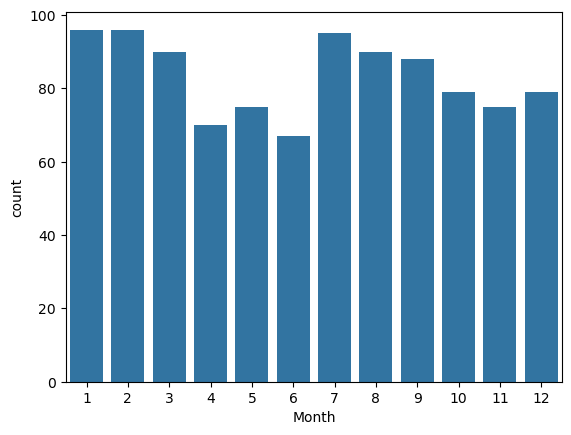

In [27]:
sn.countplot(fraud_df, x='Month')

<Axes: xlabel='Day', ylabel='count'>

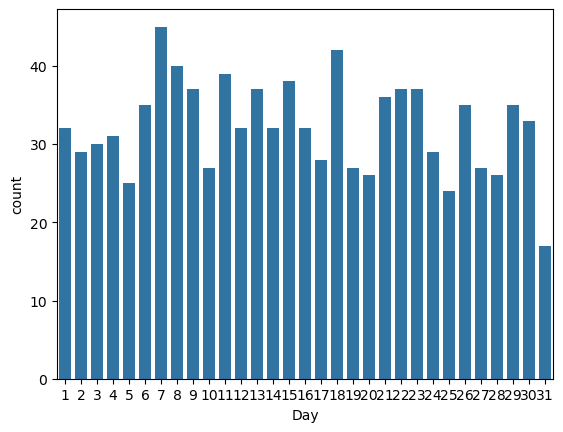

In [28]:
sn.countplot(fraud_df, x='Day')

<Axes: xlabel='TransactionType', ylabel='count'>

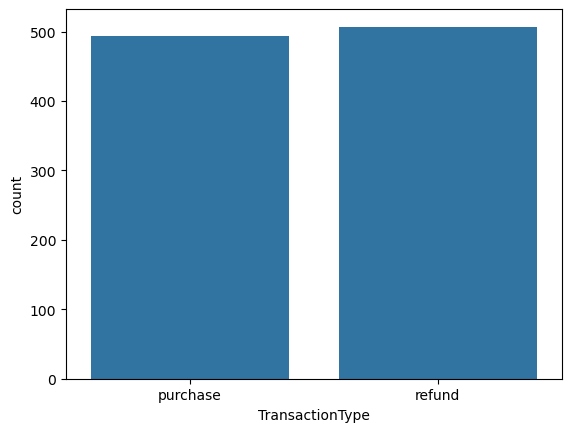

In [29]:
sn.countplot(fraud_df, x='TransactionType')

In [30]:
loc_counts = (fraud_df['Location'].value_counts()).to_dict()
loc_counts


{'New York': 116,
 'San Diego': 115,
 'Houston': 105,
 'San Antonio': 99,
 'Dallas': 99,
 'Phoenix': 99,
 'Chicago': 95,
 'Los Angeles': 95,
 'Philadelphia': 90,
 'San Jose': 87}

In [31]:
loc_percentage = {}
for key, value in loc_counts.items():
    print(key,value)
    percentage = round((value/1000)*100,0)
    loc_percentage.update({key:percentage})
loc_percentage

New York 116
San Diego 115
Houston 105
San Antonio 99
Dallas 99
Phoenix 99
Chicago 95
Los Angeles 95
Philadelphia 90
San Jose 87


{'New York': 12.0,
 'San Diego': 12.0,
 'Houston': 10.0,
 'San Antonio': 10.0,
 'Dallas': 10.0,
 'Phoenix': 10.0,
 'Chicago': 10.0,
 'Los Angeles': 10.0,
 'Philadelphia': 9.0,
 'San Jose': 9.0}

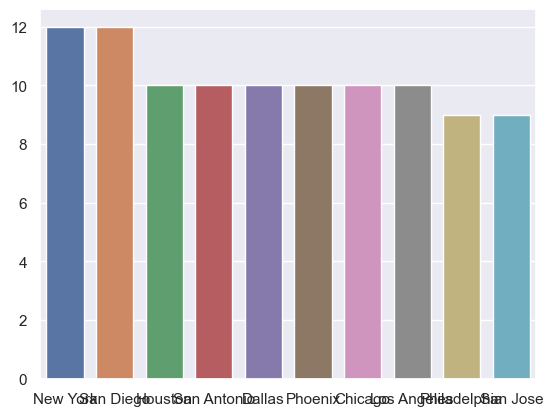

In [32]:
sn.set_theme()
loc_plot = sn.barplot(loc_percentage,x=loc_percentage.keys(),y=loc_percentage.values(), width=0.75, hue=loc_percentage.keys())

Text(0.5, 0, 'City')

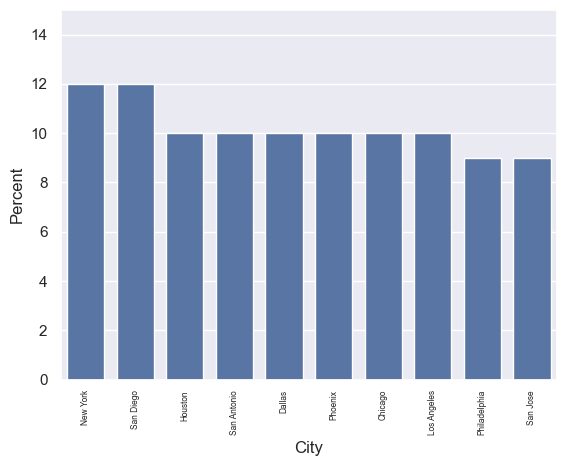

In [33]:
# Convert keys and values to lists for x and y
x = list(loc_percentage.keys())
y = list(loc_percentage.values())

# Create the bar plot
loc_plot = sn.barplot(x=x, y=y, width=0.75)

# Customize plot appearance
plt.setp(loc_plot.get_xticklabels(), rotation=90)
plt.ylim(0, 15)
loc_plot.tick_params(labelsize=6, length=4, axis='x')
loc_plot.set_ylabel("Percent", fontsize=12)
loc_plot.set_xlabel("City", fontsize=12)  # Use a reasonable font size

Text(0.5, 0, 'City')

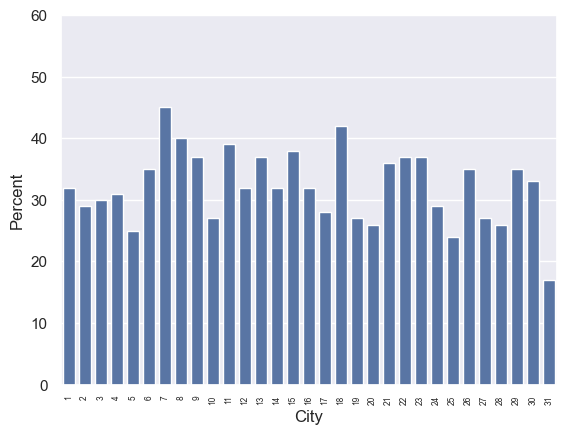

In [34]:
# Convert keys and values to lists for x and y
x = list(loc_percentage.keys())
y = list(loc_percentage.values())

# Create the bar plot
loc_plot = sn.countplot(x=fraud_df['Day'], width=0.75)

# Customize plot appearance
plt.setp(loc_plot.get_xticklabels(), rotation=90)
plt.ylim(0, 60)
loc_plot.tick_params(labelsize=6, length=4, axis='x')
loc_plot.set_ylabel("Percent", fontsize=12)
loc_plot.set_xlabel("City", fontsize=12)  # Use a reasonable font size

In [35]:
fraud_df['Date'] = pd.to_datetime(fraud_df['Date']) 
fraud_df['dayOfWeek'] = fraud_df['Date'].dt.day_name() 

/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/1444844925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['Date'] = pd.to_datetime(fraud_df['Date'])
/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_1209/1444844925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['dayOfWeek'] = fraud_df['Date'].dt.day_name()


Text(0.5, 0, 'Date')

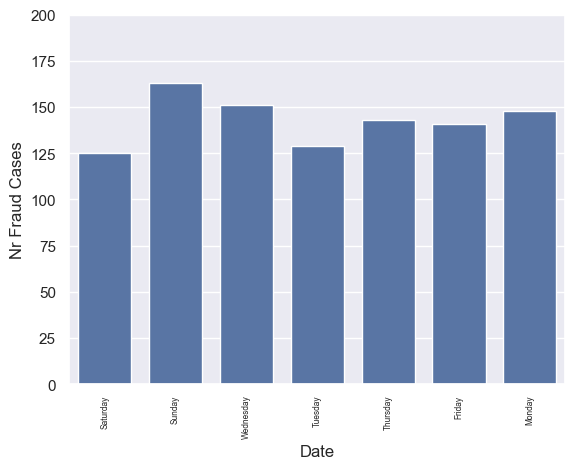

In [36]:
# Create the bar plot
loc_plot = sn.countplot(x=fraud_df['dayOfWeek'], width=0.75)

# Customize plot appearance
plt.setp(loc_plot.get_xticklabels(), rotation=90)
plt.ylim(0, 200)
loc_plot.tick_params(labelsize=6, length=4, axis='x')
loc_plot.set_ylabel("Nr Fraud Cases", fontsize=12)
loc_plot.set_xlabel("Date", fontsize=12)  # Use a reasonable font size

Text(0.5, 0, 'Month')

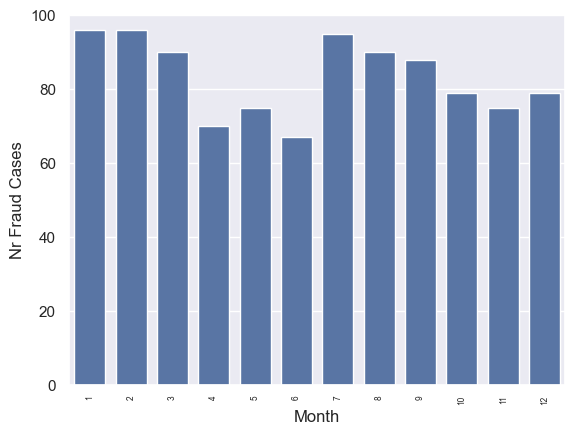

In [37]:
# Create the bar plot
loc_plot = sn.countplot(x=fraud_df['Month'], width=0.75)

# Customize plot appearance
plt.setp(loc_plot.get_xticklabels(), rotation=90)
plt.ylim(0, 100)
loc_plot.tick_params(labelsize=6, length=4, axis='x')
loc_plot.set_ylabel("Nr Fraud Cases", fontsize=12)
loc_plot.set_xlabel("Month", fontsize=12)  # Use a reasonable font size

In [38]:
merchant_counts = fraud_df['MerchantID'].value_counts().to_dict()

Text(0.5, 0, 'Nr Incidents with Merchants')

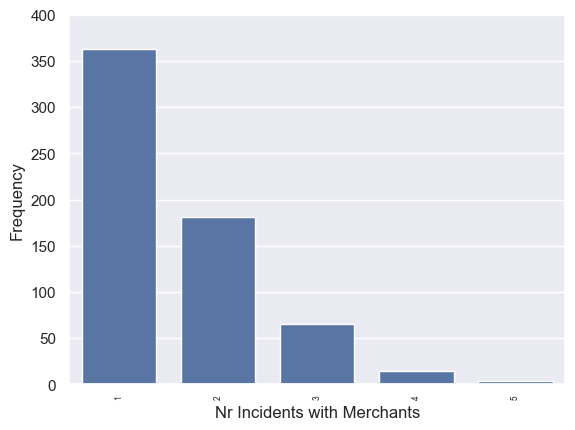

In [39]:
# Create the bar plot
loc_plot = sn.countplot(x=merchant_counts.values(), width=0.75)

# Customize plot appearance
plt.setp(loc_plot.get_xticklabels(), rotation=90)
plt.ylim(0, 400)
loc_plot.tick_params(labelsize=6, length=4, axis='x')
loc_plot.set_ylabel("Frequency", fontsize=12)
loc_plot.set_xlabel("Nr Incidents with Merchants", fontsize=12)  # Use a reasonable font size

# More than one, means higher likelihood that merchant associated with fraudulent transaction

In [49]:
pd.set_option('display.max_rows', 1000)
# Step 1: Filter to only fraud cases
fraud_df = df[df['IsFraud'] == 1]

# Step 2: Count fraud cases per merchant
fraud_counts = fraud_df['MerchantID'].value_counts()
#print(fraud_counts)
# Step 3: Filter to merchants with more than one fraud case
merchants_with_multiple_frauds = fraud_counts[fraud_counts > 1].index
#print(merchants_with_multiple_frauds)
fraud_list = merchants_with_multiple_frauds.to_list()
print(fraud_list)
# Step 4: Filter original DataFrame for those merchants
result_df = df[df['MerchantID'].isin(merchants_with_multiple_frauds)]


#pd.pivot_table(result_df, index='MerchantID', columns='Location', values='IsFraud', aggfunc='count')


[640, 958, 156, 583, 744, 276, 216, 659, 827, 544, 989, 436, 939, 747, 401, 713, 570, 367, 568, 277, 325, 698, 961, 118, 304, 135, 869, 548, 792, 470, 968, 115, 535, 834, 355, 168, 25, 278, 187, 875, 265, 308, 62, 699, 959, 433, 933, 673, 982, 386, 758, 862, 886, 612, 404, 881, 162, 179, 6, 878, 556, 619, 440, 326, 729, 164, 687, 364, 951, 269, 860, 549, 667, 420, 346, 855, 584, 737, 120, 407, 789, 598, 851, 590, 456, 102, 703, 134, 287, 587, 926, 197, 800, 446, 543, 32, 218, 976, 716, 912, 185, 257, 677, 313, 459, 60, 253, 615, 838, 116, 865, 373, 717, 831, 581, 317, 771, 124, 932, 177, 19, 259, 476, 94, 70, 198, 916, 563, 670, 327, 351, 871, 870, 28, 905, 802, 266, 455, 112, 360, 795, 245, 830, 885, 531, 815, 267, 546, 644, 42, 110, 723, 444, 859, 49, 282, 61, 392, 37, 170, 754, 254, 773, 861, 854, 255, 919, 807, 236, 637, 31, 950, 829, 786, 284, 412, 828, 181, 225, 825, 693, 119, 138, 45, 383, 414, 732, 239, 104, 422, 889, 621, 822, 376, 608, 877, 805, 481, 462, 906, 451, 695, 248, 

In [50]:
pd.pivot_table(df[df['MerchantID'].isin(fraud_list)], index='MerchantID', columns='Location', values='IsFraud', aggfunc='count')

Location,Chicago,Dallas,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Jose
MerchantID,,,,,,,,,,
4,12,7,8,13,11,7,7,10,11,9
6,3,16,13,10,9,11,7,9,5,10
9,6,12,12,4,6,6,11,11,7,8
19,12,7,13,14,15,7,8,11,8,11
25,8,15,8,9,11,13,13,15,10,12
28,11,5,12,11,6,17,7,12,6,9
29,9,11,5,7,11,6,9,15,10,10
31,9,10,16,5,5,7,9,11,8,5
32,9,8,5,5,6,8,11,6,10,12


Text(0.5, 0, 'Hour of Day')

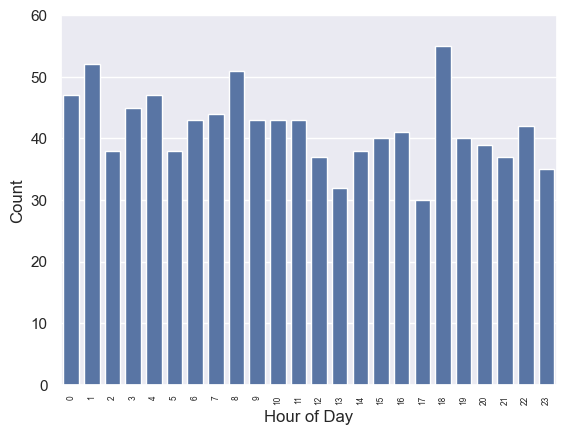

In [40]:
# Create the bar plot
loc_plot = sn.countplot(x=fraud_df['Hour'], width=0.75)

# Customize plot appearance
plt.setp(loc_plot.get_xticklabels(), rotation=90)
plt.ylim(0, 60)
loc_plot.tick_params(labelsize=6, length=4, axis='x')
loc_plot.set_ylabel("Count", fontsize=12)
loc_plot.set_xlabel("Hour of Day", fontsize=12)  # Use a reasonable font size

In [41]:
week = fraud_df[['dayOfWeek','Hour']]
week

,dayOfWeek,Hour
190,Saturday,18
191,Saturday,1
208,Sunday,1
319,Sunday,18
370,Sunday,4
...,...,...
99392,Wednesday,0
99607,Friday,8
99614,Tuesday,4
99725,Friday,4


In [42]:
overview = pd.crosstab(index=fraud_df['dayOfWeek'], columns=fraud_df['Hour'])
overview

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Friday,7,5,7,2,9,6,8,10,9,9,...,2,1,2,4,7,7,11,4,5,4
Monday,10,6,6,8,5,5,4,7,7,7,...,5,8,3,5,8,10,6,7,6,4
Saturday,3,5,5,5,3,4,5,7,6,8,...,6,4,13,2,10,2,4,4,6,6
Sunday,6,12,6,6,10,4,5,5,7,5,...,8,9,8,6,7,4,7,6,9,6
Thursday,7,12,4,6,7,7,4,5,8,7,...,4,5,5,5,8,6,8,8,4,2
Tuesday,5,5,5,11,7,8,5,5,8,2,...,7,7,4,3,8,5,0,3,4,4
Wednesday,9,7,5,7,6,4,12,5,6,5,...,6,6,6,5,7,6,3,5,8,9


<Axes: xlabel='Hour', ylabel='dayOfWeek'>

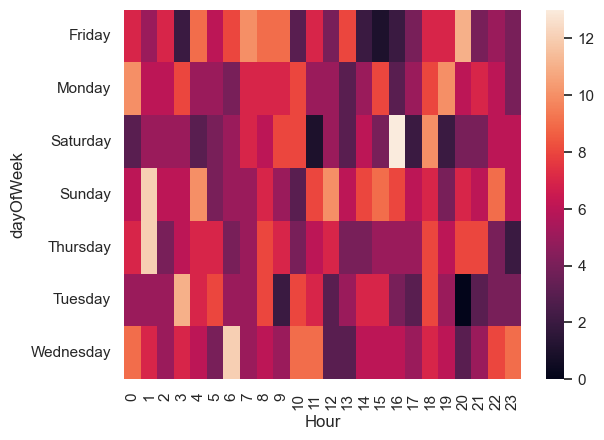

In [43]:
sn.heatmap(overview)

In [44]:
fraud_df_refund = fraud_df[fraud_df['TransactionType']=='purchase']
fraud_df_refund

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Date,Time,Year,Month,Day,Hour,Minute,Second,dayOfWeek
190,191,2024-09-07 18:24:35.463748,1703.80,916,purchase,San Jose,1,2024-09-07,18:24:35.463748,2024,9,7,18,24,35.463748,Saturday
191,192,2024-04-27 01:48:35.463751,4248.10,862,purchase,San Jose,1,2024-04-27,01:48:35.463751,2024,4,27,1,48,35.463751,Saturday
208,209,2023-11-05 01:05:35.463826,1641.32,826,purchase,San Jose,1,2023-11-05,01:05:35.463826,2023,11,5,1,05,35.463826,Sunday
319,320,2024-06-16 18:30:35.464289,281.18,237,purchase,Philadelphia,1,2024-06-16,18:30:35.464289,2024,6,16,18,30,35.464289,Sunday
370,371,2023-10-29 04:09:35.464522,3047.66,789,purchase,New York,1,2023-10-29,04:09:35.464522,2023,10,29,4,09,35.464522,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99007,99008,2023-11-22 00:05:36.023318,2505.55,732,purchase,San Diego,1,2023-11-22,00:05:36.023318,2023,11,22,0,05,36.023318,Wednesday
99392,99393,2024-06-05 00:58:36.024971,3358.10,286,purchase,Chicago,1,2024-06-05,00:58:36.024971,2024,6,5,0,58,36.024971,Wednesday
99607,99608,2023-10-27 08:34:36.026018,564.19,454,purchase,Phoenix,1,2023-10-27,08:34:36.026018,2023,10,27,8,34,36.026018,Friday
99614,99615,2023-11-21 04:18:36.026049,4083.63,514,purchase,Philadelphia,1,2023-11-21,04:18:36.026049,2023,11,21,4,18,36.026049,Tuesday


In [45]:
overview_refund = pd.crosstab(index=fraud_df_refund['Location'], columns=fraud_df_refund['dayOfWeek'])
overview_refund

dayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Location,,,,,,,
Chicago,7,10,5,8,4,5,8
Dallas,5,4,3,11,8,5,4
Houston,5,10,12,9,11,6,9
Los Angeles,7,6,9,9,4,3,7
New York,9,9,6,8,9,10,7
Philadelphia,6,1,4,10,10,4,16
Phoenix,3,6,8,9,6,5,7
San Antonio,6,7,3,10,5,6,8
San Diego,9,11,7,5,7,7,8


<Axes: xlabel='dayOfWeek', ylabel='Location'>

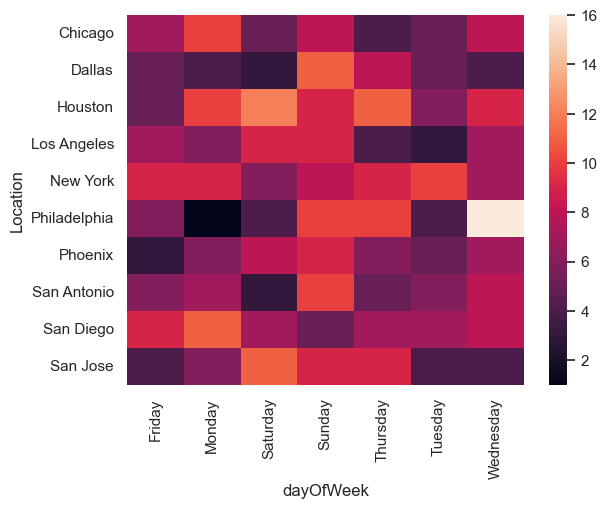

In [46]:
sn.heatmap(overview_refund)

In [47]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Date,Time,Year,Month,Day,Hour,Minute,Second
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024-04-03,14:15:35.462794,2024,04,03,14,15,35.462794
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024-03-19,13:20:35.462824,2024,03,19,13,20,35.462824
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024-01-08,10:08:35.462834,2024,01,08,10,08,35.462834
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024-04-13,23:50:35.462850,2024,04,13,23,50,35.462850
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024-07-12,18:51:35.462858,2024,07,12,18,51,35.462858


In [56]:
df['round_value'] = np.where(df['Amount'] - df['Amount'].astype(int) == 0.00, 1, 0)
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Date,Time,Year,Month,Day,Hour,Minute,Second,round_value,test
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024-04-03,14:15:35.462794,2024,04,03,14,15,35.462794,0,-0.27
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024-03-19,13:20:35.462824,2024,03,19,13,20,35.462824,0,-0.71
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024-01-08,10:08:35.462834,2024,01,08,10,08,35.462834,1,0.00
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024-04-13,23:50:35.462850,2024,04,13,23,50,35.462850,0,-0.40
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024-07-12,18:51:35.462858,2024,07,12,18,51,35.462858,0,-0.07
